ML Practical 1. Data preparation

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
#Load dataset
df = pd.read_csv("Heart.csv")

In [3]:
#Display first few records
print("First 5 Rows of the Dataset:\n")
print(df.head(), "\n")

First 5 Rows of the Dataset:

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No   



a) Find Shape of Data

In [4]:
#Display dataset shape
print("Shape of Dataset (Rows, Columns):", df.shape)

Shape of Dataset (Rows, Columns): (303, 15)


b) Find Missing Values 

In [5]:
#Check for null values in the dataset
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


c) Find data type of each column 

In [6]:
#Display data types of each column
print("\nData Types of Each Column:\n")
print(df.dtypes)


Data Types of Each Column:

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


d) Finding out Zero's 

In [7]:
#Check how many zero values exist in each column
zero_counts = (df == 0).sum()

print("\nCount of Zero Values in Each Column:\n")
print(zero_counts)


Count of Zero Values in Each Column:

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64


e) Find Mean age of patients 

In [8]:
#display mean age of patients
mean_age = df["Age"].mean()
print(f"\nMean Age of Patients: {mean_age:.2f} years")


Mean Age of Patients: 54.44 years


f) Now extract only Age, Sex, ChestPain, RestBP, Chol. Randomly divide dataset in training 
(75%) and testing (25%)

In [9]:
#Select only the given columns
subset = df[["Age", "Sex", "ChestPain", "RestBP", "Chol"]]
print("\nSelected Columns:\n")
print(subset.head())


Selected Columns:

   Age  Sex     ChestPain  RestBP  Chol
0   63    1       typical     145   233
1   67    1  asymptomatic     160   286
2   67    1  asymptomatic     120   229
3   37    1    nonanginal     130   250
4   41    0    nontypical     130   204


In [10]:
#Split into Training (75%) and Testing (25%)
from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(subset, test_size=0.25, random_state=0)

In [12]:
#Display shapes
print("\nTraining Set Shape :", train.shape)
print("Testing Set Shape  :", test.shape)


Training Set Shape : (227, 5)
Testing Set Shape  : (76, 5)


Through the diagnosis test I predicted 100 report as COVID positive, but only 45 of those were 
actually positive. Total 50 people in my sample were actually COVID positive. I have total 500 
samples. 
      Create confusion matrix based on above data and find  
I. Accuracy 
 II. Precision 
 III. Recall 
 IV. F-1  score 

Confusion Matrix:
TP=45, FP=55, FN=5, TN=395

Accuracy : 0.88
Precision: 0.45
Recall   : 0.90
F1 Score : 0.60


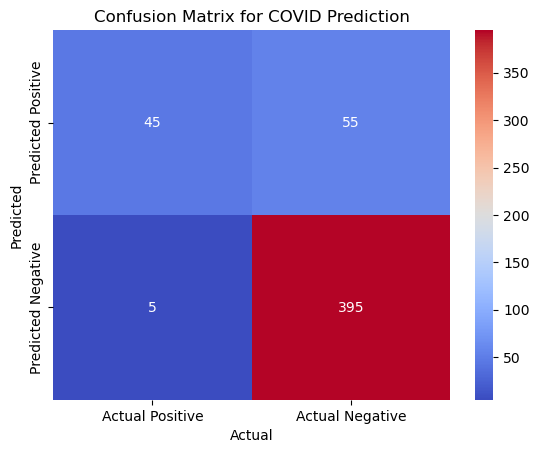

In [13]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Given data
TP = 45   # True Positives
FP = 55   # False Positives
FN = 5    # False Negatives
TN = 395  # True Negatives
total = 500

#Create confusion matrix
cm = [[TP, FP],
      [FN, TN]]

#Calculate performance metrics
accuracy = (TP + TN) / total
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

#Print results
print("Confusion Matrix:")
print(f"TP={TP}, FP={FP}, FN={FN}, TN={TN}\n")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

#Visualize confusion matrix
labels = ['Actual Positive', 'Actual Negative']
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=labels,
            yticklabels=['Predicted Positive', 'Predicted Negative'])
plt.title('Confusion Matrix for COVID Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()